We begin by importing relevant Python packages. In this case, BeatifulSoup for data extraction, requests + pandas for transformation, and seaborn + matplotlib for visualization. In the interest of reproduction, we also create code that would install all relevant packages in case the end users software is incomplete.

In [2]:
#try attempts to load packages from Python. Lets user know they have appropriate software. 
try:
    from bs4 import BeautifulSoup
    import pandas
    import requests
    import seaborn as sns
    import matplotlib.pyplot as plt
    print ("BeautifulSoup, pandas, seaborn, and matplotlib are already installed and imported.")
#except imports packages if user is missing software. Lets user know its ready to use. 
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} seaborn as sns
    !conda install --yes --prefix {sys.prefix} bs4 as plt
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup or seaborn or matplotlib or pandas were not found. Installed and imported them.")


BeautifulSoup, pandas, seaborn, and matplotlib are already installed and imported.


This is the data extraction step. We begin this codeblock by opening the webpage under the name "opened_webpage" then creating a BeautifulSoup iterable "bs" to parse the webpage. 

In [3]:
opened_webpage = requests.get("https://www.pro-football-reference.com/years/2022/receiving.htm")
print ("Webpage successfully opened...")

# Initialize a BeautifulSoup object to read and parse the webpage read
# This is like calling the __init__ function in BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage successfully loaded and parsed.")


Webpage successfully opened...
Webpage successfully loaded and parsed.


This is the first data transformation step.  We begin by collecting the name of each data row in "column_headers", then we gather all the data entries in "rows," finally we merge the collected data in "wr_stats." 

In [4]:
column_headers = bs.findAll("tr")[0]
column_headers = [i.getText() for i in column_headers.findAll('th')]

rows = bs.findAll('tr')[1:]


 #Get stats from each row
wr_stats = []
for i in range(len(rows)):
  wr_stats.append([col.getText() for col in rows[i].findAll('td')])


This is another transform step. Here we create a pandas iterable object "data" that we will use to create informative graphs. The graph simply called "graph" charts yards as a product of targets. We can see the very direct correlation between the two. 

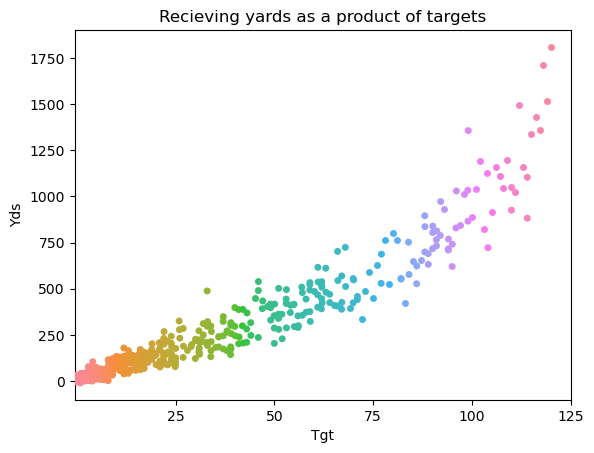

In [26]:
data = pandas.DataFrame(wr_stats, columns=column_headers[1:])

chosen_categories = ['G', 'GS', 'Tgt', 'Rec', 'Yds', 'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G', 'Fmb']
 
for i in chosen_categories:
                     data[i] = pandas.to_numeric(data[i])
                     
graph = sns.stripplot(x='Tgt', y='Yds', data = data)
plt.xticks([25, 50, 75, 100, 125], [25, 50, 75, 100, 125] )
plt.title("Recieving yards as a product of targets")
plt.show()


The next 2 code blocks describe the statistical data of the the Yards and Targets data sets. 

In [11]:
data["Yds"].describe()

count     508.000000
mean      250.074803
std       311.847138
min       -10.000000
25%        29.000000
50%       124.500000
75%       371.500000
max      1809.000000
Name: Yds, dtype: float64

In [12]:
data["Tgt"].describe()

count    508.000000
mean      34.066929
std       37.606016
min        1.000000
25%        6.000000
50%       19.000000
75%       52.000000
max      184.000000
Name: Tgt, dtype: float64

This next codeblock creates a histogram titled "hist" which shows the number of players per receiving yard. 

Text(0, 0.5, 'Number of Players')

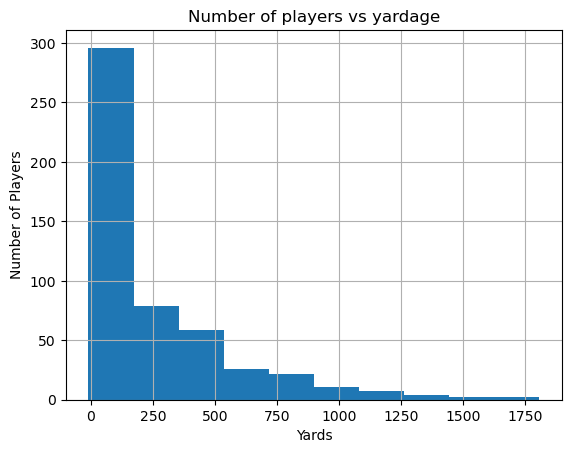

In [25]:
hist = data["Yds"].hist(bins=10)
plt.title("Number of players vs yardage")
plt.xlabel('Yards')
plt.ylabel("Number of Players")

This final codeblock is the load portion of the etl pipeline, here we save our data in a csv file. 

In [24]:
data.to_csv("Recieving_Statistics_2022.csv")